In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv003.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/notebooks


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
torch.backends.cudnn.enabled = True
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [3]:
%autoreload

cohort = mre_pinn.data.PatientCohort(patient_ids='0006', xarray_dir='../data/NAFLD_test')
#cohort = mre_pinn.data.PatientCohort.from_file('../data/NAFLD/NAFLD_2022-11-7.xarrays', xarray_dir='../data/NAFLD')
#cohort.create_xarrays()
#cohort.save_xarrays()
#cohort.metadata
cohort.load_xarrays()
cohort.eval_baseline()

  0%|          | 0/1 [00:00<?, ?it/s]Loading ../data/NAFLD_test/0006/t1_pre_in.nc
Loading ../data/NAFLD_test/0006/t1_pre_water.nc
Loading ../data/NAFLD_test/0006/t1_pre_out.nc
Loading ../data/NAFLD_test/0006/t1_pre_fat.nc
Loading ../data/NAFLD_test/0006/t2.nc
Loading ../data/NAFLD_test/0006/mre_raw.nc
Loading ../data/NAFLD_test/0006/wave.nc
Loading ../data/NAFLD_test/0006/mre.nc
Loading ../data/NAFLD_test/0006/anat_mask.nc
Loading ../data/NAFLD_test/0006/mre_mask.nc
  0%|          | 0/1 [00:00<?, ?it/s]

  return key in self.data

  return key in self.data



100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


In [4]:
pde = mre_pinn.pde.WaveEquation.from_name('helmholtz', detach=True)
pde

In [16]:
%autoreload

pino = mre_pinn.model.UNet(
    n_channels_in=4,
    n_channels_out=1,
    n_channels_block=16,
    n_unet_blocks=3,
    n_conv_per_block=1,
    width_factor=2,
    depth_factor=1,
    activ_fn='g',
)
pino

UNet(
  (linear_in): Conv3d(4, 16, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (conv_block_in): ConvBlock(
    (conv0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  )
  (unet_block): UNetBlock(
    (downsample): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv_block_in): ConvBlock(
      (conv0): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    )
    (unet_block): UNetBlock(
      (downsample): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (conv_block_in): ConvBlock(
        (conv0): Conv3d(32, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      )
      (unet_block): UNetBlock(
        (downsample): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (conv_block_in): ConvBlock(
          (conv0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
        )
        (conv_block_out): C

In [17]:
%autoreload

model = mre_pinn.training.PINOModel(cohort, pino, pde, patch_size=None, batch_size=1)
model.compile(
    optimizer='adam',
    lr=1e-3,
    loss_weights=[1e0, 1e-1],
    loss=mre_pinn.training.losses.msae_loss
)   
test_eval = mre_pinn.testing.TestEvaluator(test_every=10, interact=True)

Compiling model...
'compile' took 0.000255 s



Training model...

0         [7.54e+03, 1.70e+05]    [7.54e+03, 1.70e+05]    []  


<IPython.core.display.Javascript object>


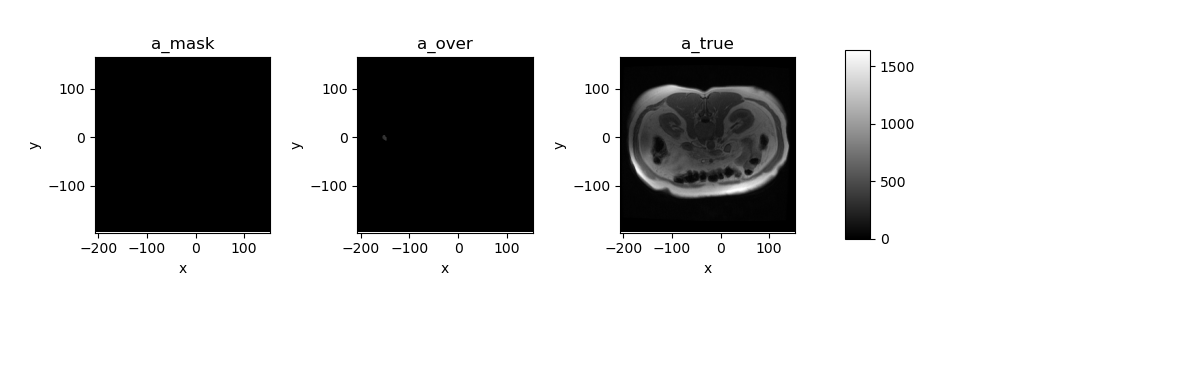

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


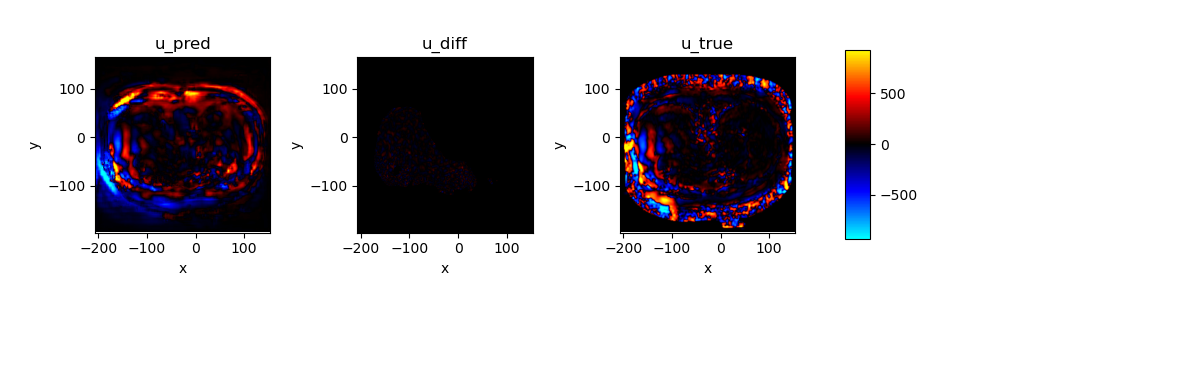

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


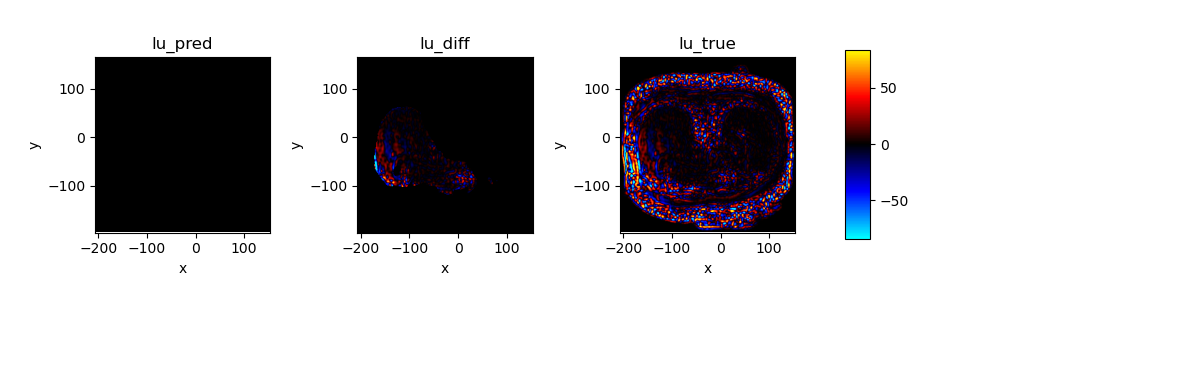

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

<IPython.core.display.Javascript object>


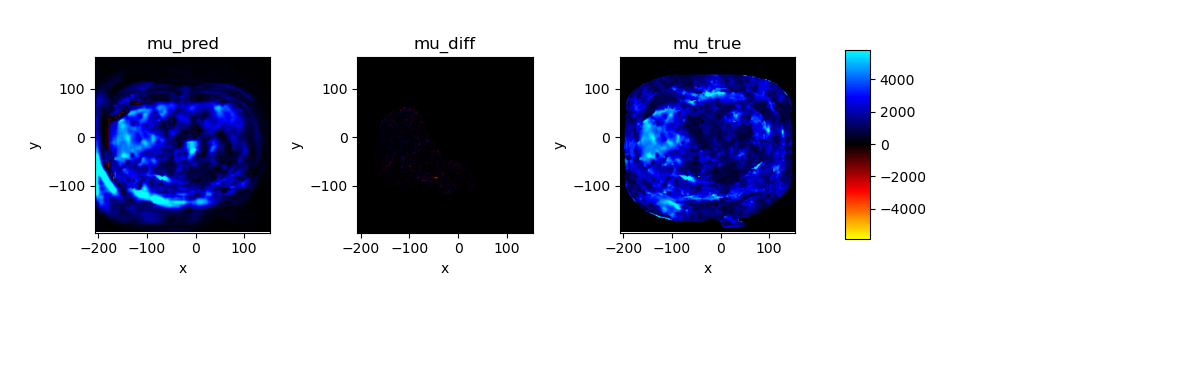

interactive(children=(SelectionSlider(description='part', options=(('real', 0), ('imag', 1)), value=0), Select…

Time spent testing: 49.65%
10        [3.05e+04, 8.76e+04]    [3.05e+04, 8.76e+04]    []  
Time spent testing: 44.40%
20        [1.36e+04, 3.16e+04]    [1.36e+04, 3.16e+04]    []  
Time spent testing: 42.13%
30        [7.54e+03, 2.66e+04]    [7.54e+03, 2.66e+04]    []  
Time spent testing: 40.84%
40        [7.60e+03, 1.89e+04]    [7.60e+03, 1.89e+04]    []  
Time spent testing: 40.41%
50        [7.56e+03, 1.58e+04]    [7.56e+03, 1.58e+04]    []  
Time spent testing: 39.80%
60        [7.49e+03, 1.54e+04]    [7.49e+03, 1.54e+04]    []  
Time spent testing: 39.62%
70        [7.45e+03, 1.44e+04]    [7.45e+03, 1.44e+04]    []  
Time spent testing: 39.26%
80        [7.41e+03, 1.35e+04]    [7.41e+03, 1.35e+04]    []  
Time spent testing: 39.18%
90        [7.37e+03, 1.32e+04]    [7.37e+03, 1.32e+04]    []  
Time spent testing: 38.94%
100       [7.31e+03, 1.26e+04]    [7.31e+03, 1.26e+04]    []  
Time spent testing: 38.88%
110       [7.23e+03, 1.28e+04]    [7.23e+03, 1.28e+04]    []  
Time spent

920       [7.34e+02, 2.25e+03]    [7.34e+02, 2.25e+03]    []  
Time spent testing: 38.85%
930       [7.59e+02, 2.49e+03]    [7.59e+02, 2.49e+03]    []  
Time spent testing: 38.85%
940       [7.38e+02, 2.26e+03]    [7.38e+02, 2.26e+03]    []  
Time spent testing: 38.85%
950       [7.06e+02, 2.13e+03]    [7.06e+02, 2.13e+03]    []  
Time spent testing: 38.84%
960       [6.95e+02, 2.08e+03]    [6.95e+02, 2.08e+03]    []  
Time spent testing: 38.85%
970       [8.80e+02, 2.79e+03]    [8.80e+02, 2.79e+03]    []  
Time spent testing: 38.85%
980       [8.77e+02, 3.09e+03]    [8.77e+02, 3.09e+03]    []  
Time spent testing: 38.84%
990       [7.88e+02, 2.32e+03]    [7.88e+02, 2.32e+03]    []  
Time spent testing: 38.85%
1000      [7.33e+02, 2.17e+03]    [7.33e+02, 2.17e+03]    []  
Time spent testing: 38.85%
1010      [6.87e+02, 2.05e+03]    [6.87e+02, 2.05e+03]    []  
Time spent testing: 38.84%
1020      [6.70e+02, 1.99e+03]    [6.70e+02, 1.99e+03]    []  
Time spent testing: 38.84%
1030      

Time spent testing: 38.86%
1840      [3.81e+02, 1.16e+03]    [3.81e+02, 1.16e+03]    []  
Time spent testing: 38.67%
1850      [3.89e+02, 1.21e+03]    [3.89e+02, 1.21e+03]    []  
Time spent testing: 38.69%
1860      [4.22e+02, 1.28e+03]    [4.22e+02, 1.28e+03]    []  
Time spent testing: 38.69%
1870      [3.71e+02, 1.14e+03]    [3.71e+02, 1.14e+03]    []  
Time spent testing: 38.70%
1880      [3.64e+02, 1.16e+03]    [3.64e+02, 1.16e+03]    []  
Time spent testing: 38.70%
1890      [4.12e+02, 1.51e+03]    [4.12e+02, 1.51e+03]    []  
Time spent testing: 38.70%
1900      [3.71e+02, 1.15e+03]    [3.71e+02, 1.15e+03]    []  
Time spent testing: 38.70%
1910      [3.68e+02, 1.14e+03]    [3.68e+02, 1.14e+03]    []  
Time spent testing: 38.70%
1920      [3.58e+02, 1.09e+03]    [3.58e+02, 1.09e+03]    []  
Time spent testing: 38.70%
1930      [3.61e+02, 1.12e+03]    [3.61e+02, 1.12e+03]    []  
Time spent testing: 38.70%
1940      [3.62e+02, 1.28e+03]    [3.62e+02, 1.28e+03]    []  
Time spent

In [ ]:
torch.backends.cudnn.enabled = False
model.train(10000, display_every=10, callbacks=[test_eval])

In [ ]:
torch.backends.cudnn.enabled = False
test_eval.model = model
test_eval.test()